<a href="https://colab.research.google.com/github/akashakash19/Movie-recommendation-using-machine-learning-with-python/blob/main/Movie_recommendation_system_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

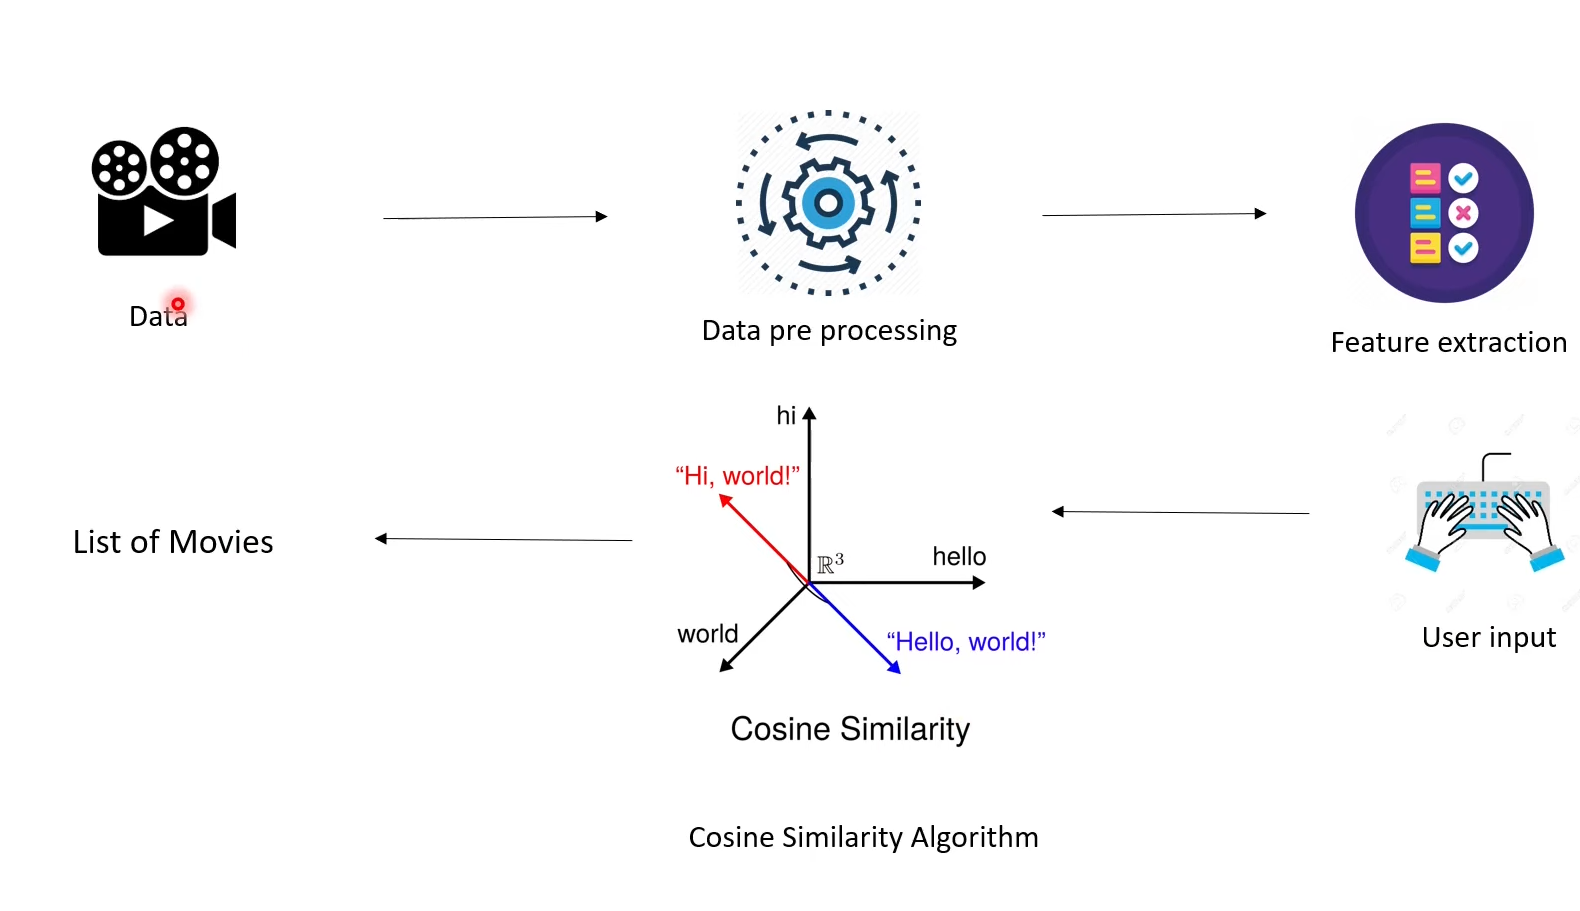

**Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#**Data collection and processing**

In [ ]:
movies = pd.read_csv('/content/movies.csv')
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
#number of rows and columns in dataset
movies.shape

(4803, 24)

In [ ]:
#selecting relevent features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
#replacing the null values with null string

for feature in selected_features:
  movies[feature] = movies[feature].fillna('')

In [ ]:
movies.isnull().sum()

,0
index,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0


In [ ]:
#combining all the 5 selected features like concantination
combined_feature = movies['genres']+' '+movies['keywords']+' '+movies['tagline']+' '+movies['cast']+' '+movies['director']
print(combined_feature)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
combined_feature.head()

,0
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction based on nove...


In [ ]:
#converting the text data to numerical data
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_feature)
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

#**Cosine similarity**

In [ ]:
#getting similarity score with cosine similarity

similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)  #each movie campare to all other movies like avator x 4803

(4803, 4803)


In [ ]:
#getting the movie name from user

movie_name = input("Enter your movie name : ")

Enter your movie name : iron man


In [ ]:
#creating a list with all movie names given in the dataset

list_of_all_titles = movies['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
#finding the close match for the movie name given by the uder

find_close_match_movie = difflib.get_close_matches(movie_name,list_of_all_titles)
print(find_close_match_movie)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
close_match = find_close_match_movie[0]
print(close_match)

Iron Man


In [ ]:
#finding the index of the movie with title

index_of_the_movie = movies[movies.title == close_match]['index'].values[0]
print(index_of_the_movie)

68


In [ ]:
#getting list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, np.float64(0.033570748780675445)), (1, np.float64(0.0546448279236134)), (2, np.float64(0.013735500604224325)), (3, np.float64(0.006468756104392058)), (4, np.float64(0.03268943310073387)), (5, np.float64(0.013907256685755475)), (6, np.float64(0.07692837576335508)), (7, np.float64(0.23944423963486416)), (8, np.float64(0.007882387851851008)), (9, np.float64(0.07599206098164224)), (10, np.float64(0.07536074882460439)), (11, np.float64(0.01192606921174529)), (12, np.float64(0.013707618139948932)), (13, np.float64(0.01237607492508997)), (14, np.float64(0.09657127116284187)), (15, np.float64(0.007286271383816743)), (16, np.float64(0.22704403782296806)), (17, np.float64(0.013112928084103857)), (18, np.float64(0.04140526820609594)), (19, np.float64(0.07883282546834255)), (20, np.float64(0.07981173664799916)), (21, np.float64(0.011266873271064948)), (22, np.float64(0.006892575895462364)), (23, np.float64(0.006599097891242659)), (24, np.float64(0.012665208122549735)), (25, np.float64(0.0)), 

In [ ]:
len(similarity_score)   #we dont want all similar movie

4803

In [ ]:
#sorting the movies based on their similarity score

sorted_similarity_movies = sorted(similarity_score,key = lambda x:x[1],reverse = True)
print(sorted_similarity_movies)

[(68, np.float64(1.0)), (79, np.float64(0.40890433998005965)), (31, np.float64(0.3146705244947752)), (7, np.float64(0.23944423963486416)), (16, np.float64(0.22704403782296806)), (26, np.float64(0.21566241096831162)), (85, np.float64(0.20615862984665334)), (182, np.float64(0.19573956139611612)), (511, np.float64(0.16702973947860683)), (3623, np.float64(0.1609246088135586)), (64, np.float64(0.1529992413944514)), (203, np.float64(0.1481866794866512)), (174, np.float64(0.1471993120942043)), (4401, np.float64(0.14505971470107848)), (101, np.float64(0.14401677581826292)), (46, np.float64(0.14216268867232232)), (169, np.float64(0.1380947013224906)), (1740, np.float64(0.1362438264169076)), (94, np.float64(0.13616819579029016)), (788, np.float64(0.13305895074229218)), (126, np.float64(0.13263982780511063)), (131, np.float64(0.13137698586006535)), (33, np.float64(0.13089810941050173)), (2487, np.float64(0.12309731939910509)), (783, np.float64(0.12162995562040377)), (138, np.float64(0.11846458075

In [ ]:
#print the name of similar movies based on their index

print("Movies suggested for you : \n")

i = 1

for movie in sorted_similarity_movies:
  index = movie[0]
  title_from_index = movies[movies.index==index]['title'].values[0]
  if(i<11):
    print(i,'.',title_from_index)
    i+=1


Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made


#**Movie Recommendation System**

In [ ]:
movie_name = input("Enter your movie name : ")

list_of_all_titles = movies['title'].tolist()

find_close_match_movie = difflib.get_close_matches(movie_name,list_of_all_titles)

close_match = find_close_match_movie[0]

index_of_the_movie = movies[movies.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similarity_movies = sorted(similarity_score,key = lambda x:x[1],reverse = True)

print("Movies suggested for you : \n")

i = 1

for movie in sorted_similarity_movies:
  index = movie[0]
  title_from_index = movies[movies.index==index]['title'].values[0]
  if(i<11):
    print(i,'.',title_from_index)
    i+=1


Enter your movie name : avatar
Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
